In [382]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

oil_df = pd.read_csv('U.S._Domestic_Crude_Oil.csv')
gdp_df = pd.read_csv('Gross_Domestic_Product.csv', index_col=0)
gdp_percentage_df = pd.read_csv('Gross_Domestic_Product_Percentage.csv')
ev_sales = pd.read_csv('EV_Sales_US_2011-2019.csv')

oil_df.rename(columns={"U.S. Domestic Crude Oil First Purchase Prices Monthly": "Month_year", "Unnamed: 1" : "Price_per_Barrel"}, inplace=True)


oil_df = oil_df[1:]
oil_df


,Month_year,Price_per_Barrel
1,20-Jan,62.86
2,19-Dec,64.01
3,19-Nov,61.69
4,19-Oct,59.3
5,19-Sep,60.34
...,...,...
312,Feb-94,9.39
313,Jan-94,8.51
314,Dec-93,8.49
315,Nov-93,10.69


In [383]:
yearly_oil_df = oil_df['Month_year'].str.split("-")

clean = [Year[0] for Year in yearly_oil_df[0:229]]
clean2 = [Year[1] for Year in yearly_oil_df[229:]]
clean.extend(clean2)

oil_df.rename(columns={'Month_year': 'Year'}, inplace=True)

oil_df['Year'] = clean
oil_df

,Year,Price_per_Barrel
1,20,62.86
2,19,64.01
3,19,61.69
4,19,59.3
5,19,60.34
...,...,...
312,94,9.39
313,94,8.51
314,93,8.49
315,93,10.69


In [384]:
oil_df["Price_per_Barrel"] = oil_df["Price_per_Barrel"].apply(lambda x: float(x))

In [385]:
oil_df["Year"] = oil_df["Year"].apply(lambda x: float(x))


In [386]:
oil_df.groupby('Year').mean()
oil_df = oil_df.groupby('Year').mean()
oil_df

,Price_per_Barrel
Year,
0.0,24.372500
1.0,19.505000
2.0,20.905833
3.0,25.803333
4.0,33.364167
5.0,45.000833
6.0,54.870833
7.0,62.069167
8.0,87.015833


In [387]:
oil_df.index

Float64Index([ 0.0,  1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0,
              11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 93.0,
              94.0, 95.0, 96.0, 97.0, 98.0, 99.0],
             dtype='float64', name='Year')

In [388]:
oil_df.reset_index(inplace=True)

In [389]:
oil_df

,Year,Price_per_Barrel
0,0.0,24.372500
1,1.0,19.505000
2,2.0,20.905833
3,3.0,25.803333
4,4.0,33.364167
5,5.0,45.000833
6,6.0,54.870833
7,7.0,62.069167
8,8.0,87.015833
9,9.0,53.819167


In [390]:
for _, row in oil_df.iterrows():
    if row['Year'] <= 9:
        row['Year'] = f"{200}{row['Year']}"
    elif row['Year'] < 21:
        row['Year'] = f"{20}{row['Year']}"
    else:
        row['Year'] = f"{19}{row['Year']}"

In [391]:
oil_df

,Year,Price_per_Barrel
0,2000.0,24.372500
1,2001.0,19.505000
2,2002.0,20.905833
3,2003.0,25.803333
4,2004.0,33.364167
5,2005.0,45.000833
6,2006.0,54.870833
7,2007.0,62.069167
8,2008.0,87.015833
9,2009.0,53.819167


In [392]:


oil_df = oil_df.round(decimals=0).astype(object)
oil_df

,Year,Price_per_Barrel
0,2000,24
1,2001,20
2,2002,21
3,2003,26
4,2004,33
5,2005,45
6,2006,55
7,2007,62
8,2008,87
9,2009,54


In [393]:
final_oil_df = oil_df.sort_values('Year')
final_oil_df

,Year,Price_per_Barrel
21,1993,10
22,1994,12
23,1995,13
24,1996,16
25,1997,15
26,1998,9
27,1999,14
0,2000,24
1,2001,20
2,2002,21


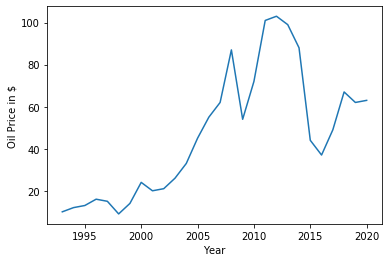

In [394]:
plt.plot(final_oil_df.Year, final_oil_df.Price_per_Barrel)
plt.xlabel("Year")
plt.ylabel("Oil Price in $")
plt.show()

In [395]:
gdp_df

,Unnamed: 1,Unnamed: 2,1929,1930,1931,1932,1933,1934,1935,1936,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Line,,,,,,,,,,,,,,,,,,,,,
1,Gross domestic product,A191RC,"104,556","92,160","77,391","59,522","57,154","66,800","74,241","84,830",...,"14,992,052","15,542,582","16,197,007","16,784,851","17,527,258","18,224,780","18,715,040","19,519,424","20,580,223","21,427,690"
2,Personal consumption expenditures,DPCERC,"77,382","70,136","60,672","48,714","45,945","51,461","55,932","62,188",...,"10,185,836","10,641,109","11,006,814","11,317,210","11,822,753","12,284,281","12,748,483","13,312,060","13,998,666","14,562,662"
3,Goods,DGDSRC,"43,770","38,164","31,709","24,127","23,756","28,483","31,628","35,969",...,"3,317,825","3,518,121","3,637,739","3,729,973","3,862,956","3,920,335","3,995,905","4,165,019","4,364,783","4,504,964"
4,Durable goods,DDURRC,"9,829","7,661","5,911","3,959","3,762","4,564","5,493","6,749",...,"1,048,962","1,093,499","1,144,221","1,189,413","1,242,075","1,305,897","1,352,645","1,412,570","1,475,585","1,526,830"
5,Nondurable goods,DNDGRC,"33,941","30,503","25,798","20,169","19,994","23,919","26,135","29,221",...,"2,268,862","2,424,622","2,493,518","2,540,559","2,620,881","2,614,438","2,643,260","2,752,450","2,889,199","2,978,133"
6,Services,DSERRC,"33,613","31,972","28,963","24,587","22,189","22,978","24,305","26,218",...,"6,868,011","7,122,988","7,369,075","7,587,238","7,959,797","8,363,946","8,752,578","9,147,041","9,633,883","10,057,698"
7,Gross private domestic investment,A006RC,"17,170","11,428","6,549","1,819","2,276","4,296","7,370","9,391",...,"2,165,473","2,332,562","2,621,754","2,826,013","3,044,178","3,223,077","3,178,709","3,370,687","3,628,305","3,743,929"
8,Fixed investment,A007RC,"15,630","11,651","7,661","4,169","3,680","4,876","6,230","8,230",...,"2,111,555","2,286,300","2,550,542","2,721,483","2,960,212","3,091,207","3,151,639","3,340,497","3,573,581","3,675,636"
9,Nonresidential,A008RC,"11,560","9,184","5,762","3,294","2,955","3,833","4,829","6,403",...,"1,734,981","1,907,465","2,118,527","2,211,494","2,400,057","2,457,411","2,453,145","2,584,749","2,786,922","2,878,117"


In [396]:
gdp_df = gdp_df.drop(gdp_df.columns[1:66], axis =1)
gdp_df

,Unnamed: 1,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Line,,,,,,,,,,,,,,,,,,,,,
1,Gross domestic product,"6,858,559","7,287,236","7,639,749","8,073,122","8,577,552","9,062,817","9,630,663","10,252,347","10,581,822",...,"14,992,052","15,542,582","16,197,007","16,784,851","17,527,258","18,224,780","18,715,040","19,519,424","20,580,223","21,427,690"
2,Personal consumption expenditures,"4,451,984","4,720,965","4,962,590","5,244,596","5,536,790","5,877,248","6,279,078","6,762,144","7,065,634",...,"10,185,836","10,641,109","11,006,814","11,317,210","11,822,753","12,284,281","12,748,483","13,312,060","13,998,666","14,562,662"
3,Goods,"1,642,347","1,746,554","1,815,533","1,917,671","2,006,506","2,108,439","2,287,062","2,453,172","2,525,593",...,"3,317,825","3,518,121","3,637,739","3,729,973","3,862,956","3,920,335","3,995,905","4,165,019","4,364,783","4,504,964"
4,Durable goods,"551,532","607,171","635,738","676,295","715,530","779,293","855,568","912,572","941,515",...,"1,048,962","1,093,499","1,144,221","1,189,413","1,242,075","1,305,897","1,352,645","1,412,570","1,475,585","1,526,830"
5,Nondurable goods,"1,090,814","1,139,382","1,179,795","1,241,376","1,290,976","1,329,146","1,431,493","1,540,600","1,584,078",...,"2,268,862","2,424,622","2,493,518","2,540,559","2,620,881","2,614,438","2,643,260","2,752,450","2,889,199","2,978,133"
6,Services,"2,809,637","2,974,411","3,147,057","3,326,925","3,530,285","3,768,809","3,992,017","4,308,972","4,540,041",...,"6,868,011","7,122,988","7,369,075","7,587,238","7,959,797","8,363,946","8,752,578","9,147,041","9,633,883","10,057,698"
7,Gross private domestic investment,"1,106,826","1,256,484","1,317,489","1,432,055","1,595,600","1,736,671","1,887,059","2,038,408","1,934,842",...,"2,165,473","2,332,562","2,621,754","2,826,013","3,044,178","3,223,077","3,178,709","3,370,687","3,628,305","3,743,929"
8,Fixed investment,"1,086,012","1,192,700","1,286,316","1,401,255","1,524,674","1,672,952","1,826,243","1,983,864","1,973,126",...,"2,111,555","2,286,300","2,550,542","2,721,483","2,960,212","3,091,207","3,151,639","3,340,497","3,573,581","3,675,636"
9,Nonresidential,"799,204","868,853","962,247","1,043,194","1,149,088","1,254,144","1,364,477","1,498,432","1,460,067",...,"1,734,981","1,907,465","2,118,527","2,211,494","2,400,057","2,457,411","2,453,145","2,584,749","2,786,922","2,878,117"


In [397]:
gdp_df.columns

Index(['Unnamed: 1', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019'],
      dtype='object')

In [398]:
gdp_df = gdp_df.drop(gdp_df.index[1:26])
gdp_df

,Unnamed: 1,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Line,,,,,,,,,,,,,,,,,,,,,
1,Gross domestic product,"6,858,559","7,287,236","7,639,749","8,073,122","8,577,552","9,062,817","9,630,663","10,252,347","10,581,822",...,"14,992,052","15,542,582","16,197,007","16,784,851","17,527,258","18,224,780","18,715,040","19,519,424","20,580,223","21,427,690"


In [399]:
gdp_df = gdp_df.transpose()
gdp_df

Line,1
Unnamed: 1,Gross domestic product
1993,"6,858,559"
1994,"7,287,236"
1995,"7,639,749"
1996,"8,073,122"
1997,"8,577,552"
1998,"9,062,817"
1999,"9,630,663"
2000,"10,252,347"
2001,"10,581,822"


In [400]:
gdp_df.reset_index(inplace=True)

In [401]:
gdp_df

Line,index,1
0,Unnamed: 1,Gross domestic product
1,1993,"6,858,559"
2,1994,"7,287,236"
3,1995,"7,639,749"
4,1996,"8,073,122"
5,1997,"8,577,552"
6,1998,"9,062,817"
7,1999,"9,630,663"
8,2000,"10,252,347"
9,2001,"10,581,822"


In [402]:
gdp_df = gdp_df.drop(gdp_df.index[0])

gdp_df

Line,index,1
1,1993,"6,858,559"
2,1994,"7,287,236"
3,1995,"7,639,749"
4,1996,"8,073,122"
5,1997,"8,577,552"
6,1998,"9,062,817"
7,1999,"9,630,663"
8,2000,"10,252,347"
9,2001,"10,581,822"
10,2002,"10,936,418"


In [405]:
gdp_df.set_index["Year"]

TypeError: 'method' object is not subscriptable

In [370]:
gdp_df.rename(columns={"index": "Year", 1: "Gross_Domestic_Product"}, inplace=True)




In [377]:
gdp_df["Year"].astype(int)

1     1993
2     1994
3     1995
4     1996
5     1997
6     1998
7     1999
8     2000
9     2001
10    2002
11    2003
12    2004
13    2005
14    2006
15    2007
16    2008
17    2009
18    2010
19    2011
20    2012
21    2013
22    2014
23    2015
24    2016
25    2017
26    2018
27    2019
Name: Year, dtype: int32

In [379]:
final_oil_df["Year"].astype(int)

21    1993
22    1994
23    1995
24    1996
25    1997
26    1998
27    1999
0     2000
1     2001
2     2002
3     2003
4     2004
5     2005
6     2006
7     2007
8     2008
9     2009
10    2010
11    2011
12    2012
13    2013
14    2014
15    2015
16    2016
17    2017
18    2018
19    2019
20    2020
Name: Year, dtype: int32

In [380]:
merged_df = final_oil_df.merge(gdp_df, on="Year")
merged_df

,Year,Price_per_Barrel,Gross_Domestic_Product


,Year,Price_per_Barrel,Gross_Domestic_Product


In [375]:
gdp_df.dtypes

Line
Year                      object
Gross_Domestic_Product    object
dtype: object

In [325]:
x_axis = np.arange(1993, 2020, 5)
x_axis

array([1993, 1998, 2003, 2008, 2013, 2018])

In [326]:
y_axis = np.arange(6850000,22000000,3000000)
y_axis

array([ 6850000,  9850000, 12850000, 15850000, 18850000, 21850000])

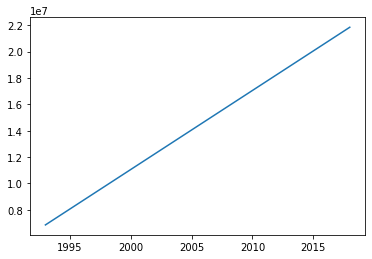

In [327]:
plt.plot(x_axis, y_axis)
plt.show()

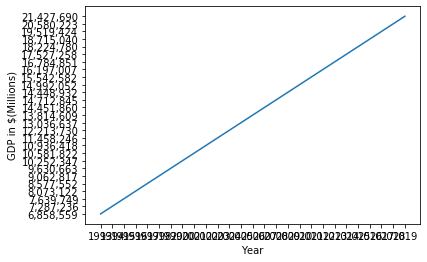

In [286]:
plt.plot(gdp_df.Year, gdp_df.Gross_Domestic_Product)
plt.xlabel("Year")
plt.ylabel("GDP in $(Millions)")
plt.show()

In [323]:
ev_sales = ev_sales.dropna(thresh=2)
ev_sales

,U.S. PEV Sales by Model (In Order of Market Introduction),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Vehicle,Type,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
1,Chevy Volt,PHEV,"7,671","23,461","23,094","18,805","15,393","24,739","20,349","18,306","4,915","156,733"
2,Nissan Leaf,EV,"9,674","9,819","22,610","30,200","17,269","14,006","11,230","14,715","12,365","141,888"
3,Smart ED,EV,342,139,923,"2,594","1,387",657,544,"1,219",680,"8,485"
4,Mitsubishi I EV,EV,76,588,"1,029",196,115,94,6,-,-,"2,104"
5,BMW Active E,EV,-,673,-,-,-,-,-,-,-,673
6,Prius PHEV,PHEV,-,"12,749","12,088","13,264","4,191","2,474","20,936","27,595","23,630","116,927"
7,Ford Focus EV,EV,-,683,"1,738","1,964","1,582",901,"1,817",560,-,"9,245"
8,Honda Fit EV,EV,-,93,569,407,2,-,-,-,-,"1,071"
9,Tesla Model S,EV,-,"2,400","19,400","16,750","26,200","30,200","26,500","25,745","15,090","162,285"


In [201]:
ev_sales.reset_index(inplace=True)

,index,U.S. PEV Sales by Model (In Order of Market Introduction),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,0,Vehicle,Type,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
1,1,Chevy Volt,PHEV,"7,671","23,461","23,094","18,805","15,393","24,739","20,349","18,306","4,915","156,733"
2,2,Nissan Leaf,EV,"9,674","9,819","22,610","30,200","17,269","14,006","11,230","14,715","12,365","141,888"
3,3,Smart ED,EV,342,139,923,"2,594","1,387",657,544,"1,219",680,"8,485"
4,4,Mitsubishi I EV,EV,76,588,"1,029",196,115,94,6,-,-,"2,104"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,62,Last updated: January 2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,63,Acronyms:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,64,EV: All-electric vehicle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,65,PEV: Plug-in electric vehicle. These include b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
